In [4]:
# Import statements! Are loans given to people who actually need it, 3 more files, contain poverty index of every country

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt

In [9]:
drone_stats = pd.read_csv("data-science-for-good-kiva-crowdfunding/PakistanDroneAttacksWithTemp Ver 9 (October 19, 2017).csv", encoding = "ISO-8859-1")

In [16]:
drone_stats.head(20)

,S#,Date,Time,Location,City,Province,No of Strike,Al-Qaeda,Taliban,Civilians Min,...,Injured Min,Injured Max,Women/Children,Special Mention (Site),Comments,References,Longitude,Latitude,Temperature(C),Temperature(F)
0,1.0,"Friday, June 18, 2004",22:00,Near Wana,south Waziristan,FATA,1.0,NaN,1.0,0.0,...,NaN,NaN,N,Blast occured in courtyard of the house of lon...,Village in Wana,http://archives.dawn.com/2004/06/19/top1.htm,69.9000,33.0333,28.475,83.255
1,2.0,"Sunday, May 08, 2005",23:30,Mir Ali (Near Afghan Border),North Waziristan,FATA,1.0,1.0,NaN,0.0,...,NaN,NaN,N,Drone struck a car driven by local warlord- ki...,Civilian killied was Samiullah Khan who was a ...,http://www.msnbc.msn.com/id/7847008/,70.1455,32.9746,11.475,52.655
2,3.0,"Thursday, December 01, 2005",NaN,Haisori- Miran Shah,North Waziristan,FATA,1.0,1.0,NaN,0.0,...,NaN,2.0,NaN,Explosive occurred at a mud house,No. 3 Al-Qaeda's Leader AbuHamza Rabia killed ...,http://edition.cnn.com/2005/WORLD/asiapcf/12/0...,70.1455,32.9746,7.080,44.744
3,4.0,"Friday, January 06, 2006",NaN,Saidgai village- 115km north of Wana,North Waziristan,FATA,1.0,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,http://www.reuters.com/article/2007/04/27/us-p...,70.1455,32.9746,0.535,32.963
4,5.0,"Friday, January 13, 2006",3:00,Damadola Village,Bajaur Agency,FATA,1.0,NaN,NaN,0.0,...,NaN,2.0,Y,Three houses were tarheted in Damadola village...,Masood Khan house was among those bombed. Want...,http://www.dailytimes.com.pk/default.asp?page=...,71.5000,34.6833,10.025,50.045
5,6.0,"Monday, October 30, 2006",NaN,Chenagai,Bajaur Agency,FATA,1.0,NaN,NaN,0.0,...,NaN,NaN,Y,Explosion on Seminary filled with students,21 teenagers were killed,http://archives.dawn.com/2006/10/31/top1.htm,71.5000,34.6833,18.120,64.616
6,7.0,"Friday, April 27, 2007",NaN,Saidgai village,North Waziristan,FATA,1.0,NaN,NaN,0.0,...,NaN,2.0,NaN,attack on house of Habibullah which was next t...,millitanta were killed while making bombs,http://www.reuters.com/article/idUSISL11111020...,70.1455,32.9746,25.770,78.386
7,8.0,"Tuesday, June 19, 2007",10:30,MamiRogha- Dattakhel,North Waziristan,FATA,3.0,NaN,NaN,20.0,...,NaN,15.0,Y,Explosion occured at cluster of 3 houses and t...,millitanta were killed while making bombs,http://www.express.com.pk/epaper/PoPupwindow.a...,70.1455,32.9746,24.395,75.911
8,9.0,"Friday, November 02, 2007",NaN,Dandey darpakhel-Miranshah,North Waziristan,FATA,1.0,NaN,NaN,5.0,...,6.0,12.0,NaN,Missile killed the militants inside a compound...,House was training camp and explosives store b...,http://www.express.com.pk/epaper/PoPupwindow.a...,70.1455,32.9746,15.325,59.585
9,10.0,"Monday, December 03, 2007",NaN,Jani Khel,Bannu,KPK,1.0,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,http://archives.dawn.com/archives/39900,70.6042,32.9861,13.790,56.822


In [11]:
drone_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 25 columns):
S#                        404 non-null float64
Date                      404 non-null object
Time                      173 non-null object
Location                  402 non-null object
City                      404 non-null object
Province                  404 non-null object
No of Strike              404 non-null float64
Al-Qaeda                  97 non-null float64
Taliban                   141 non-null float64
Civilians Min             336 non-null float64
Civilians Max             359 non-null float64
Foreigners Min            93 non-null float64
Foreigners Max            140 non-null float64
Total Died Min            308 non-null float64
Total Died Mix            402 non-null float64
Injured Min               145 non-null float64
Injured Max               276 non-null float64
Women/Children            336 non-null object
Special Mention (Site)    330 non-null object
Comments   

In [12]:
drone_stats.describe()

,S#,No of Strike,Al-Qaeda,Taliban,Civilians Min,Civilians Max,Foreigners Min,Foreigners Max,Total Died Min,Total Died Mix,Injured Min,Injured Max,Longitude,Latitude,Temperature(C),Temperature(F)
count,404.000000,404.000000,97.000000,141.000000,336.000000,359.000000,93.000000,140.000000,308.000000,402.000000,145.000000,276.000000,403.000000,403.000000,401.000000,401.000000
mean,202.514851,1.450495,1.010309,9.390071,7.761905,14.161560,1.462366,5.314286,12.616883,18.199005,5.544828,9.630435,68.809672,34.277947,16.019289,60.840207
std,116.794436,1.118322,5.114308,55.591723,71.105575,134.046817,7.128569,31.441641,110.477448,182.169279,33.389740,79.872724,6.890073,6.716537,8.646118,15.570087
min,1.000000,1.000000,0.000000,0.000000,-4.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.896179,25.678480,-14.155000,6.521000
25%,101.750000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,3.000000,5.000000,0.000000,2.000000,69.900000,32.974600,9.120000,48.416000
50%,202.500000,1.000000,0.000000,4.000000,3.000000,5.000000,0.000000,2.000000,5.000000,6.000000,2.000000,4.000000,70.145500,32.974600,17.895000,64.211000
75%,303.250000,1.000000,0.000000,7.000000,5.000000,8.500000,1.000000,4.000000,8.000000,10.750000,4.000000,6.000000,70.145500,33.033300,23.795000,74.831000
max,405.000000,8.000000,49.000000,662.000000,1304.000000,2542.000000,68.000000,372.000000,1943.000000,3658.000000,402.000000,1329.000000,71.500000,70.540720,29.485000,85.073000


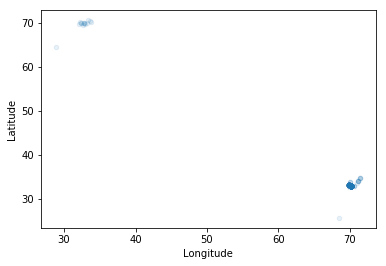

In [15]:
%matplotlib inline

drone_stats.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = .1)
plt.show()

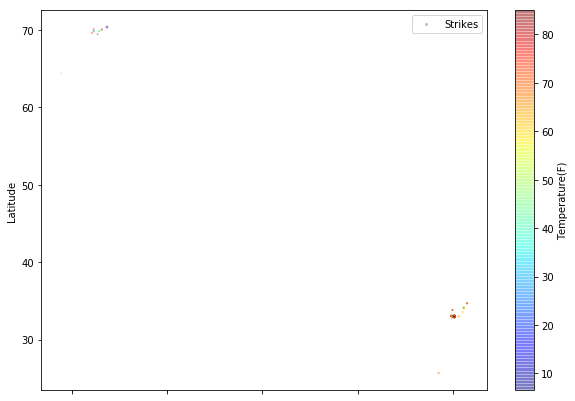

In [17]:

drone_stats.plot(kind = "scatter", x = "Longitude", y = "Latitude", alpha = .3,
                 s = drone_stats["No of Strike"], label = "Strikes", figsize=(10, 7),
                 c = "Temperature(F)", cmap = plt.get_cmap("jet"), colorbar = True,
                 )

plt.legend()
plt.show()